# Trends, Patterns, and Directions in the 2023 U.S. Job Market

**Introduction:** The team members, Eugene Lim and Tyler Simms, will be using two datasets. The first dataset includes 2023 LinkedIn job post listings over a two day period during the year. The second dataset includes real survery responses that provide salary data and certain demographic information for different individuals. These two datasets can be used to identify trends within the current US job market. Our working project title is "Trends, Patterns, and Directions in the 2023 U.S. Job Market". We will be working with both of these datasets because they provide great detail. The first dataset has several important variables we could use for analysis such as the type of job, pay period, salary, company ID, and whether remote work is allowed or not. The first dataset is from Kaggle and its title is "LinkedIn Job Postings - 2023". The dataset was collected by user Arsh Kon using LinkedIn's backend search API over the period July 23-24, 2023. The dataset has separate companion dataframes which add information about companies, industries, and benefits that follow the principles of tidy data. The second dataset's important variables that we could use for analysis contain information about age, race, education, gender, experience, location, and salary. The second dataset is also from Kaggle and its title is "How Much Money Do You Make? Salary Survey". The dataset was taken from a Google Sheets spreadsheet that hosts the responses from a live survey created by Alison Green on AskAManager.org (Survey link: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.htmluser). The survey began on April 27, 2021 and is still accepting new responses.

Hyperlink to github.io webstie: https://eugenelim17.github.io/

Link to dataset #1: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

Link to dataset #2: https://www.kaggle.com/datasets/masoomaalghawas/ask-a-manager-salary-survey-2021

Link to GitHub repo: https://github.com/eugenelim17/eugenelim17.github.io/tree/main

Link to Trello Board: https://trello.com/b/nKeaOhI6/data-science-job-market-project

**Collaboration Plan:** We plan to meet once a week through Zoom in order to work on the project. Alternative ways in which we will communicate include via text message and on a Trello dashboard where we will be uploading any important updates, questions, and idea proposals that we may have. We have also created a Github repo that is shared with each other in order to organize, update and maintain official versions of our code. We will be collaborating on the code in our notebook file through Google Colab.

In [1]:
!git clone https://github.com/eugenelim17/eugenelim17.github.io

Cloning into 'eugenelim17.github.io'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 120 (delta 20), reused 3 (delta 3), pack-reused 83
Receiving objects: 100% (120/120), 23.79 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

job_postings_df = pd.read_csv("eugenelim17.github.io/job_postings.csv.zip", compression="zip")

# First dataframe before any cleaning or modification
job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.690000e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,1.690000e+12,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,1.690000e+12,NaN,17.0,https://www.linkedin.com/jobs/view/133196985/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",NaN,1.690000e+12,NaN,NaN,https://www.linkedin.com/jobs/view/381055942/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",NaN,1.690000e+12,NaN,2.0,https://www.linkedin.com/jobs/view/529257371/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",NaN,1.690000e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3701373516/...,https://aspirebakeriescareers.com/job/West-Col...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",2.0,1.690000e+12,NaN,7.0,https://www.linkedin.com/jobs/view/3701373522/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",NaN,1.690000e+12,NaN,3.0,https://www.linkedin.com/jobs/view/3701373523/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",NaN,1.690000e+12,NaN,10.0,https://www.linkedin.com/jobs/view/3701373524/...,https://opportunities.columbia.edu/jobs/mri-ma...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [3]:
salaries_df = pd.read_csv("eugenelim17.github.io/2302023 Raw Data - Ask A Manager Salary Survey 2021.csv")

# Second dataframe before any cleaning or modification
salaries_df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27935,2/10/2023 16:15:00,25-34,Oil & Gas,Finance process Expert,NaN,25000,0.0,USD,NaN,NaN,Colombia,NaN,Bogota,8 - 10 years,8 - 10 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin"
27936,2/16/2023 19:14:37,25-34,Computing or Tech,It manager,NaN,55000,NaN,USD,NaN,NaN,United States,Ohio,Cincinnati,11 - 20 years,2 - 4 years,Some college,Man,White
27937,2/16/2023 20:11:48,25-34,Engineering or Manufacturing,Senior Engineer I,Automotive mechanical engineering,87000,7000.0,USD,NaN,NaN,United States,New York,Ithaca,5-7 years,5-7 years,College degree,Man,White
27938,2/17/2023 17:58:48,25-34,Computing or Tech,software engineer,NaN,64000,0.0,USD,NaN,NaN,denmark,NaN,århus,2 - 4 years,2 - 4 years,College degree,Man,White


**Project Plan:** As mentioned in the introduction and seen above in the displayed dataframes, our first dataset includes a high volume of observations on individual LinkedIn job post listings that appeaared on the LinkedIn website over July 23-24, 2023, and our second dataset includes a high volume of survery responses that contain salary data and certain demographic information for different individuals from a survey on AskAManager.org that began on April 27, 2021 and is still live. Our team has chosen these datasets because the datasets are quite comprehensive and the creaters did significant due dilligence and were thorough with their methods in gathering the data for each observation. Our first question we hope to answer is "What is the relationship between jobs that are in person and remote with regard to compensation?" The first dataset contains a variable that already categorizes each job as in person or remote. Through filtering on this variable, we can find material and interesting differences based on other relevant variables. Our second question, or really set of questions, includes those such as "What industries have the highest and lowest salaries and benefits?", "What are the most lucrative individual job titles regardless of industry?", "Which geographic job locations, states, and cities have the highest and lowest salaries and benefits?", and "What companies have job postings with the most lucrative salaries and benefits?" These questions can all be answered through the values in the 27 columns of the first dataset and the 18 columns of the second dataset. Some of the most useful columns from the first dataset include company ID, job title, maximum, median, and minimum salary, location, and benefit information, which is included in one of the companion dataframes. Similarly useful columns from the second dataset include industry, job title, annual salary, country, state, and city. Our third question is "How does age, race, gender, years of experience, and education affect salary?" The second dataset has columns containing the personal information discussed in the question.

**Model Ideas:** The two model ideas that we are building to each relate to one of our datasets. Our first idea based on the "LinkedIn Job Postings - 2023" dataset is a k-nearest neighbors classification model that predicts whether observations are remote positions or in-person positions based on features such as maximum salary, median salary, minimum salary, company id, job title, location, experience level, and work type. Our second idea based on "How Much Money Do You Make? Salary Survey" is a regression model that predicts salaries of observations using features such as age, race, gender, education, experience, job title, industry, and location. We are excited to build these intriguing models and measure their performance.

**Analysis of "LinkedIn Job Postings - 2023" Dataset:**

In [4]:
# Dataframe data types before any adjustment to the types
job_postings_df.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [5]:
job_postings_df["job_id"] = job_postings_df["job_id"].astype(str)
job_postings_df["company_id"] = job_postings_df["company_id"].astype(str)

In [6]:
# Dataframe data types after adjustment to some of the types
job_postings_df.dtypes

job_id                         object
company_id                     object
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

Listed above are the variables in the dataframe and their data types. We have changed the data type of job_id and company_id to object since IDs are a categorical variable. No other data types need to be changed.

In [7]:
# Confirms that all observations without a compensation type value also have no maximum, median, or minimum salary
job_postings_df[job_postings_df['compensation_type'].isnull()]
job_postings_df[job_postings_df['compensation_type'].isnull()]["max_salary"].isnull().sum()
job_postings_df[job_postings_df['compensation_type'].isnull()]["med_salary"].isnull().sum()
job_postings_df[job_postings_df['compensation_type'].isnull()]["min_salary"].isnull().sum()

# Rows that do not have a compensation type are removed here using .notna()
job_postings_df = job_postings_df[job_postings_df['compensation_type'].notna()].copy()

Our first step of the data cleaning portion of the project was to ensure that all the job post observations we were using had a compensation type value included. We identified that every observation without a compensation type value had no maximium salary, minimum salary, and median salary. Job postings without salary information are essentially useless in our analysis because salary information is vital. When looking at the dataset, 9,348 job postings did not include a compensation value. So in order to get rid of these rows without a compensation type, we have used the .notna() function.

In [8]:
# Any salary that is on an hourly basis is adjusted to a yearly salary by multiplying by 40 since that is the American national standard for weekly hours worked
# and then multiplying by 52 because there are 52 weeks in a year.
job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['min_salary'], axis=1)

job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['min_salary'], axis=1)

job_postings_df['pay_period'] = 'Yearly'

After removing the rows with no compensation type, we see that there are three different compensation types: hourly, monthly, and yearly. The salaries among job listings are much easier to compare if the salaries are all one compensation type, so we decided to convert all the salaries to yearly salaries. This conversion is done by multiplying any salary that is hourly by 40 since that is the American standard of hours worked per week, and then multiplying by 52 since there are 52 weeks in a year. Any salary that is monthly is multiplied by 12 since there are 12 months in a year.

In [9]:
# Fill the "remote_allowed" column for in-person workers with a value of 0
job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(0)

# Create new filtered dataframes to help calculate summary statistics for remote and in-person workers based on yearly median salary
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
in_person = job_postings_df[job_postings_df['remote_allowed'] == 0]

In the dataframe, we identified that job listings have a value of 1 in the "remote_allowed" column if they are remote positions, but if they are in person then they have a value of NaN in the column. We gave these in-person positions a value of 0 by simply using the .fillna() function with an argument of 0.

In [10]:
# Summary statistics for remote workers
summary_remote = remote_workers['med_salary'].describe()

# Summary statistics for in-person workers
summary_in_person = in_person['med_salary'].describe()

# Print the summary statistics
print("Summary Statistics for Remote Positions:")
print(summary_remote)

print("\nSummary Statistics for In-Person Positions:")
print(summary_in_person)

Summary Statistics for Remote Positions:
count       117.000000
mean     124759.309402
std      148034.308594
min       12000.000000
25%       41600.000000
50%       91520.000000
75%      150000.000000
max      800000.000000
Name: med_salary, dtype: float64

Summary Statistics for In-Person Positions:
count       864.000000
mean      70000.259109
std       68801.396689
min       10000.000000
25%       36400.000000
50%       46633.600000
75%       75000.000000
max      998426.000000
Name: med_salary, dtype: float64


When comparing the two types of workers by their summary statistics, we can see that the remote positions have a significantly higher average median salary (124,759.31 USD) compared to in-person positions (70,000.26 USD). Both categories also have relatively high standard deviations, which indicates a wide variation in salaries, but remote postions have a higher standard deviation. The higher standard deviation for remote positions is likely due to there being less remote positions with a value in the median salary column than in-person positions. We can already predict both will be skewed right in a graph, since the means for both types of workers are greater than their medians, which are seen from the 50th percentile. The main interesting result we see when comparing the two types of positions is that the mean median salary for remote positions is significantly higher (approximately 124,759 USD) compared to that of the in-person positions (approximately 70,000 USD), which indicates that remote work may be associated with greater earning potential. One reason why this  may be the case is because remote work allows companies to tap into a global talent pool. They can hire the best candidates, regardless of their physical location, which can lead to increased competition for top talent around the world. These comparisons are relevant to the question about how in person and remote postions differ relative to compensation.

In [11]:
# Makes average salary column because controlled analysis has too few observations for "med_salary"
job_postings_df["avg_salary"] = (job_postings_df["max_salary"] + job_postings_df["min_salary"]) / 2

# Assuming 'remote_allowed' is the column indicating remote work and 'title' is the column containing job titles
# Filter data for remote and in-person workers
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
in_person = job_postings_df[job_postings_df['remote_allowed'] == 0]

# Get unique job titles for remote and in-person workers
remote_job_titles = set(remote_workers['title'].unique())
in_person_job_titles = set(in_person['title'].unique())

# Find common job titles between remote and in-person workers
common_job_titles = remote_job_titles.intersection(in_person_job_titles)

# DataFrames for common job titles
remote_common_jobs = remote_workers[remote_workers['title'].isin(common_job_titles)].copy()
in_person_common_jobs = in_person[in_person['title'].isin(common_job_titles)].copy()

print("Common Job Titles:")
print(common_job_titles)

# Print the summary statistics for remote and in-person workers with common job titles
print("\nSummary Statistics for Remote Positions with Common Job Titles:")
print(remote_common_jobs['avg_salary'].describe())

print("\nSummary Statistics for In-Person Positions with Common Job Titles:")
print(in_person_common_jobs['avg_salary'].describe())

Common Job Titles:
{'Staff Accountant', 'Senior Business Analyst', 'Full Stack Engineer', 'Director of Development', 'Business Intelligence Analyst', 'Financial Controller', 'Senior Tax Manager', 'Social Media Manager', 'Senior Manager, R&D', 'Power BI Developer', 'Regional Sales Manager', 'Scoring Content Specialist', 'Production Artist', 'Inside Sales Representative', 'Maintenance Technician', 'Senior Project Manager', 'Logistics Coordinator', 'Remote Medical Device Supplier Engineer', 'Systems Administrator', 'Sales Representative', 'Sales Account Executive', 'Program Assistant', 'Quality Assurance Analyst', 'Technical Writer', 'UI/UX Designer', 'Attorney', 'Director of Product, MyBSWHealth', 'Senior Financial Analyst', 'Account Manager', 'HR Generalist', 'Controller', 'Video Editor', 'Analyst, Compensation Operations', 'Sales And Marketing Specialist', 'Compliance Specialist', 'Senior Product Designer', 'Data Engineer', 'Architect', 'Business Development Executive', 'Scrum Master',

We have again displayed the summary statistics for salary of remote and in-person positions, however this time we have controlled both groups to include only job titles that have at least one listing as a remote position and one listing as an in-person position. This time the salary numbers are also an average of the maximum and minimum salary as the median salary column had too many null values after controlling for intersecting job titles. On average, the average salary for remote positions is 102,119 USD, which is higher than that for in-person positions at 94,210 USD. Both remote and in-person positions exhibit relatively low variability in average salaries compared to the uncontrolled results. The relatively small sample sizes may contribute to the observed variability in average salaries. More data points would provide a more stable estimate of the central tendency and spread of salaries for these common job titles. When comparing the quartiles, for remote positions, 25% of the remote positions have an average salary less than or equal to 67,500 USD. 50% of remote positions have an average salary less than or equal to 92,500 USD. 75% of remote positions have an average salary less than or equal to 143,300 USD. For in-person positions, 25% of in-person positions have an average salary less than or equal to 57,500 USD. 50% of in-person positions have an average salary less than or equal to 87,500 USD. 75% of in-person positions have an average salary less than or equal to 119,600 USD. We can see that Remote positions generally have higher quartile values compared to in-person positions. This suggests that, on average, remote positions tend to offer higher salaries. The spread in average salaries is wider for in-person positions compared to remote positions, indicating less variability in remote position salaries.

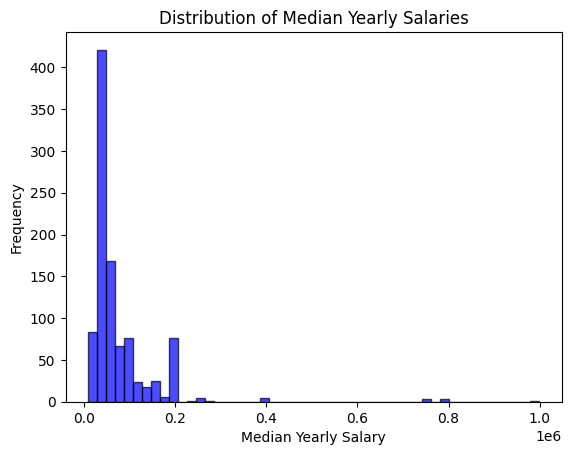

In [12]:
job_postings_df['med_salary'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries')
plt.xlabel('Median Yearly Salary')
plt.ylabel('Frequency')
plt.show()

Shown above is a histogram which shows the distribution of median yearly salaries. The distribution is orginally skewed heavily to the right without any transformations because a majority of salaries are less than 100,000 USD, with few job post listings having a salary even as high as 150,000 USD.

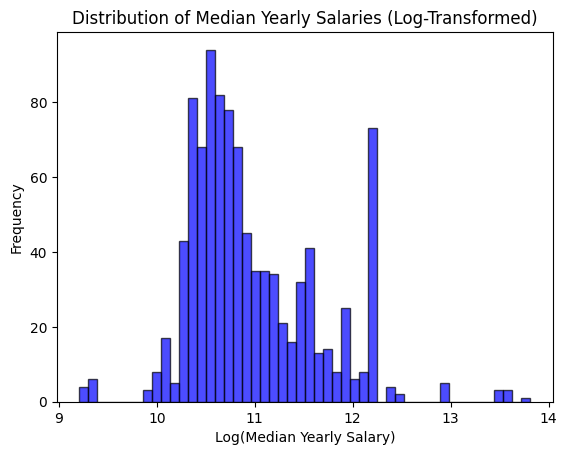

In [13]:
job_postings_df['med_salary_log'] = np.log1p(job_postings_df['med_salary'])
job_postings_df['med_salary_log'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries (Log-Transformed)')

# Set labels and title
plt.xlabel('Log(Median Yearly Salary)')
plt.ylabel('Frequency')
plt.show()

To improve the skew we have applied a logarithmic transformation, specifically by taking in the logarithmic value each of the median salaries, which makes the histogram look much more symmetrical. The distribution is still right skewed to a certain degree so the symmetry can be further improved in the future. An interesting conclusion from this histrogram is that although the right skew of the distribution does smooth out while moving up the x-axis in a relatively normal way, we see that there is a significant spike around 12 in the median yearly salary. We predicted that there would be one parabolic curve within the graph, but there appears to be a lot of jobs in the market that pay around the 200,000 USD range (This x-axis value is taken from the original histogram before any transformations). This histogram is relevant to gaining a better understanding of the overall distribution of median yearly salaries and can be applied on smaller subsets of the dataframe after filtering on certain columns to visualize the differences in the distribution for each of these subsets.

In [14]:
# Define the mapping from job titles to industries
job_title_to_industry_mapping = {
    "Warehouse Order Selector": "Warehouse",
    "Package Handler (Warehouse like)": "Warehouse",
    "Warehouse Associate": "Warehouse",
    "Warehouse Worker - SAS Safety Corp.": "Warehouse",
    "Equipment Technician": "Technician",
    "Field Service Technician": "Technician",
    "Pest Control Technician": "Technician",
    "Central Services Technician": "Technician"
}

# Use the .replace() method to create the 'industries' column
job_postings_df['industries'] = job_postings_df['title'].replace(job_title_to_industry_mapping)

Here a map called "Industries" is created, where eight occupations are organized into a dictionary based on what type of job they are, and the two types in this example are "Warehouse" and "Technician".

In [15]:
selected_industries = ["Warehouse", "Technician"]
filtered_df = job_postings_df[job_postings_df['industries'].isin(selected_industries)].copy()

# Summary statistics for "med_salary" for each industry
summary_statistics = filtered_df.groupby('industries')['med_salary'].describe()

# Print the summary statistics
print(summary_statistics)


            count          mean           std      min      25%      50%  \
industries                                                                 
Technician   11.0  50196.218182  12715.308459  41600.0  42500.0  42640.0   
Warehouse    16.0  41233.800000  12502.981055  31200.0  33280.0  38740.0   

                75%      max  
industries                    
Technician  50679.2  75000.0  
Warehouse   41459.6  82000.0  


We use .groupby() and .describe() to compare the summary statistics between technicians and warehouse workers. As seen from the summary statistics, we can see the "Technician" industry generally offers the higher average median salary, with an average of 50,196.22 USD, but with significant variation, which is evidenced by the high standard deviation. The "Warehouse" industry has a lower average median salary of 41,233.80 USD, and has a slightly lower, but still considerable variation in salary. In both industries, there is a wide range of median salaries, with the maximum salaries being significantly higher than the average. This fact suggests that some job postings within these industries offer very high salaries relative to the rest of the job postings. One important detail we can see here is that the "Warehouse" industry, despite having a lower average median salary compared to the "Technician" industry, has a higher maximum value. In the "Warehouse" industry, the maximum salary is 82,000 USD, while in the "Technician" industry, it's 75,000 USD. This inconsistent statistic reflects that a substantial portion of workers in the "Warehouse" industry receive salaries significantly below this maximum value, as the average, minimum, 25th quartile, 50th quartile, and 75th quartile salary all favor the "Technician" industry and also indicates that there's a relatively lower floor for salaries in the "Warehouse" industry. This analysis reaffirms our previous understanding that the maximum median salary is an unrealistic amount for most workers in the "Warehouse" industry, the same being true to a slightly lesser extent for the "Technician" industry. Another interesting statistic is that the minimum median salary for the "Technician" industry is still greater than the average value for the "Warehouse" industry. The comparison of these industries' summary statistics for median yearly salary is relevant to the question about the best and worst industries for compensation.

In [16]:
# First dataframe after cleaning and modification
job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,avg_salary,med_salary_log,industries
0,85008768,nan,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,Yearly,Full-time,"Chico, CA",NaN,1.690000e+12,0.0,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,48880.0,NaN,Licensed Insurance Agent
5,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,Yearly,Full-time,"Albany, GA",5.0,1.690000e+12,0.0,49.0,https://www.linkedin.com/jobs/view/903408693/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,39500.0,NaN,Office Associate
8,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,104000.0,NaN,104000.0,Yearly,Part-time,"Muskegon, MI",NaN,1.690000e+12,0.0,4.0,https://www.linkedin.com/jobs/view/1029078768/...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY,104000.0,NaN,Registered Nurse (RN) Vaccinator
12,1535492735,nan,Administrative Assistant,We are looking for a responsible Administrativ...,41600.0,NaN,37440.0,Yearly,Part-time,"Ocoee, FL",3.0,1.690000e+12,0.0,5.0,https://www.linkedin.com/jobs/view/1535492735/...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY,39520.0,NaN,Administrative Assistant
13,1657978824,89350959.0,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",144000.0,NaN,144000.0,Yearly,Contract,"Texas, United States",NaN,1.690000e+12,1.0,NaN,https://www.linkedin.com/jobs/view/1657978824/...,HTTP://AMERICANSTEELBUILDERS.COM,OffsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,USD,BASE_SALARY,144000.0,NaN,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15871,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,NaN,60000.0,Yearly,Full-time,"Texas, United States",7.0,1.690000e+12,1.0,56.0,https://www.linkedin.com/jobs/view/3701373385/...,http://landings.bravado.co/vacancies/sales-man...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,65000.0,NaN,Sales Manager
15875,3701373427,1321042.0,Design Intern,Looking to redefine the skyline or to be a par...,49691.2,NaN,39686.4,Yearly,Internship,"Miramar, FL",2.0,1.690000e+12,0.0,20.0,https://www.linkedin.com/jobs/view/3701373427/...,https://workforcenow.adp.com/mdf/recruitment/r...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,workforcenow.adp.com,0,INTERNSHIP,USD,BASE_SALARY,44688.8,NaN,Design Intern
15876,3701373432,2121817.0,Continuous Improvement Specialist,Continuous Improvement Specialist Opportunity!...,NaN,200000.0,NaN,Yearly,Full-time,"Mississippi, United States",11.0,1.690000e+12,0.0,28.0,https://www.linkedin.com/jobs/view/3701373432/...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,NaN,12.206078,Continuous Improvement Specialist
15878,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,NaN,91900.0,Yearly,Full-time,"Torrance, CA",4.0,1.690000e+12,0.0,29.0,https://www.linkedin.com/jobs/view/3701373493/...,https://herbalifecareers.ttcportals.com/jobs/1...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY,98550.0,NaN,Sr. B

**Analysis of "How Much Money Do You Make? Salary Survey" Dataset:**

In [17]:
# Displays the second dataset again in its original state to avoid needing to scroll back to the top
salaries_df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27935,2/10/2023 16:15:00,25-34,Oil & Gas,Finance process Expert,NaN,25000,0.0,USD,NaN,NaN,Colombia,NaN,Bogota,8 - 10 years,8 - 10 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin"
27936,2/16/2023 19:14:37,25-34,Computing or Tech,It manager,NaN,55000,NaN,USD,NaN,NaN,United States,Ohio,Cincinnati,11 - 20 years,2 - 4 years,Some college,Man,White
27937,2/16/2023 20:11:48,25-34,Engineering or Manufacturing,Senior Engineer I,Automotive mechanical engineering,87000,7000.0,USD,NaN,NaN,United States,New York,Ithaca,5-7 years,5-7 years,College degree,Man,White
27938,2/17/2023 17:58:48,25-34,Computing or Tech,software engineer,NaN,64000,0.0,USD,NaN,NaN,denmark,NaN,århus,2 - 4 years,2 - 4 years,College degree,Man,White


In [18]:
# Changes column titles
salaries_df.columns = ["Timestamp", "Age", "Industry", "Job Title", "Additional Job Title Context", "Annual Salary", "Additional Compensation", "Currency",
                       "Other Currency Type", "Additional Income Context", "Country", "U.S. State", "City", "Professional Experience Overall",
                       "Professional Experience In Field", "Education", "Gender", "Race"]

Before checking dtypes, the column titles needed to be changed as they were too long and formated as questions from the survey. The titles are now short and direct.

In [19]:
# Dataframe data types before any adjustment to the types
salaries_df.dtypes

Timestamp                            object
Age                                  object
Industry                             object
Job Title                            object
Additional Job Title Context         object
Annual Salary                        object
Additional Compensation             float64
Currency                             object
Other Currency Type                  object
Additional Income Context            object
Country                              object
U.S. State                           object
City                                 object
Professional Experience Overall      object
Professional Experience In Field     object
Education                            object
Gender                               object
Race                                 object
dtype: object

In [20]:
salaries_df["Annual Salary"] = salaries_df["Annual Salary"].str.replace(",","").astype(float)

In [21]:
# Dataframe data types after adjustment to one of the types
salaries_df.dtypes

Timestamp                            object
Age                                  object
Industry                             object
Job Title                            object
Additional Job Title Context         object
Annual Salary                       float64
Additional Compensation             float64
Currency                             object
Other Currency Type                  object
Additional Income Context            object
Country                              object
U.S. State                           object
City                                 object
Professional Experience Overall      object
Professional Experience In Field     object
Education                            object
Gender                               object
Race                                 object
dtype: object

Listed above are the variables in the dataframe and their data types. We have changed the data type of Annual Salary to float64 as the data type wasa previously object due to some of the salary values having commas. No other data types need to be changed.

In [22]:
salaries_df.isnull().sum()

Timestamp                               0
Age                                     0
Industry                               72
Job Title                               0
Additional Job Title Context        20708
Annual Salary                           0
Additional Compensation              7253
Currency                                0
Other Currency Type                 27743
Additional Income Context           24906
Country                                 0
U.S. State                           4981
City                                   75
Professional Experience Overall         0
Professional Experience In Field        0
Education                             213
Gender                                166
Race                                  168
dtype: int64

In [23]:
salaries_df.dropna(subset=["Industry", "City", "Education", "Gender", "Race"], inplace=True)
salaries_df.reset_index(drop=True, inplace=True)

We dropped observations with missing values in the Industry, City, Education, Gender, and Race columns. All the other columns with missing values were optional questions in the survey. The dataframe still has 27,352 rows.

In [24]:
# Gets total number of duplicated observations
salaries_df.duplicated().sum()

0

The dataframe has no duplicates.

In [25]:
# Removes salaries not in USD
salaries_df = salaries_df[salaries_df["Currency"] == "USD"]

We have removed salaries not in USD as these observations cannot be compared to the salaries in USD and confuse the distribution.

In [26]:
male_salaries = salaries_df[salaries_df['Gender'] == 'Man']['Annual Salary']
female_salaries = salaries_df[salaries_df['Gender'] == 'Woman']['Annual Salary']

male_salary_stats = male_salaries.describe()
female_salary_stats = female_salaries.describe()

# Setting options to display numbers in normal notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Printing the results
print("Male Salary Statistics:")
print(male_salary_stats)

print("Female Salary Statistics:")
print(female_salary_stats)


Male Salary Statistics:
count        4225.000
mean       139217.590
std       1569637.922
min             0.000
25%         69000.000
50%        100006.000
75%        148000.000
max     102000000.000
Name: Annual Salary, dtype: float64
Female Salary Statistics:
count     17774.000
mean      87014.565
std       69046.173
min           0.000
25%       55000.000
50%       75000.000
75%      104575.000
max     5000044.000
Name: Annual Salary, dtype: float64


The mean salary for males (139,217.590 USD) is higher than the mean salary for females (87,014.565 USD), suggesting, on average, males earn more in this dataset. Both male and female salary distributions have high standard deviations, indicating significant variability in salaries. The minimum salary of $0 for both genders may indicate cases where individuals reported zero or missing salaries. The extremely high maximum values for both males and females (102,000,000 USD and 5,000,044 USD respectively) indicate outliers exist that skew the overall averages, so these values should be removed in the future. When evaluating the gender salary gap, this could be caused by a multitude of factors, one example being career advancements. If there are fewer females in higher-paying executive or managerial roles, it can contribute to a lower mean for females. Another factor is that salary is being compared only across gender. Another variable, such as race, age, or education, could actually be having more of a clear impact on the salary gap.

In [27]:
pd.crosstab(salaries_df["Gender"], salaries_df["Education"])

Education,College degree,High School,Master's degree,PhD,"Professional degree (MD, JD, etc.)",Some college
Gender,,,,,,
Man,2174,157,1087,193,158,456
Non-binary,307,12,170,17,14,73
Other or prefer not to answer,117,7,64,10,10,17
Prefer not to answer,0,0,0,1,0,0
Woman,8586,221,6075,881,935,1076


In [28]:
pd.crosstab(salaries_df["Gender"], salaries_df["Education"], normalize=True)

Education,College degree,High School,Master's degree,PhD,"Professional degree (MD, JD, etc.)",Some college
Gender,,,,,,
Man,0.095,0.007,0.048,0.008,0.007,0.020
Non-binary,0.013,0.001,0.007,0.001,0.001,0.003
Other or prefer not to answer,0.005,0.000,0.003,0.000,0.000,0.001
Prefer not to answer,0.000,0.000,0.000,0.000,0.000,0.000
Woman,0.376,0.010,0.266,0.039,0.041,0.047


<Axes: xlabel='Education', ylabel='Gender'>

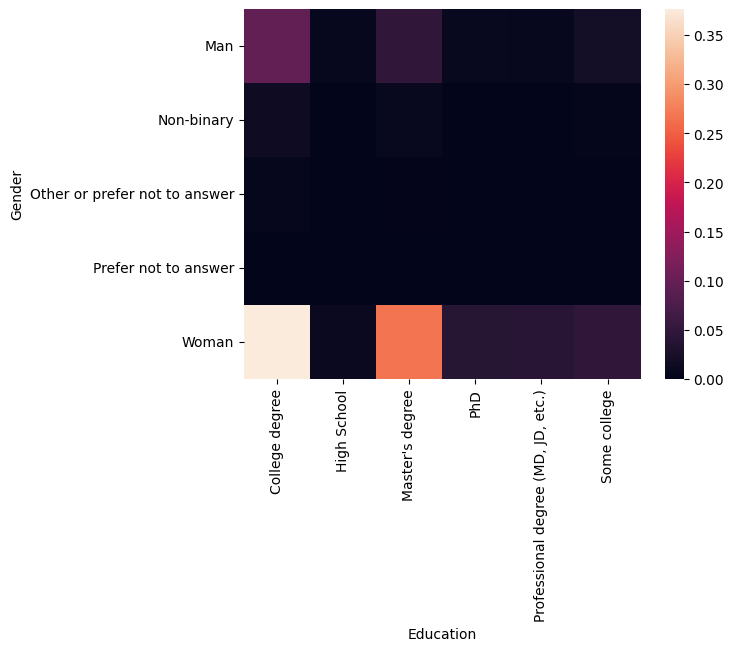

In [29]:
joint = pd.crosstab(salaries_df["Gender"], salaries_df["Education"], normalize=True)

sns.heatmap(joint)

The cross-tabulations and heatmap above provide information on the relationship between gender and education in the context of mean salaries. Notably, college degrees and master's degrees emerge as the two most common education types across both men and women. However, it is essential to acknowledge that the current analysis may be skewed due to a higher number of responses from women compared to men. To gain a more accurate understanding of how education impacts the gender wage gap, future analysis should explore the ratio of each education type across gender while considering the total number of responses by each gender. Additionally, considering other variables in conjunction with gender will be crucial for a comprehensive examination of factors influencing salary disparities.